<a href="https://colab.research.google.com/github/JaperTai77/Tensorflow_DL/blob/main/tf2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Skimlit

## Preparation

#### Import data

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
import os
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

#### Preprocess data into dataframe

In [3]:
def openfile(path):
  with open(path,'r') as f:
    return f.readlines()

In [4]:
openfile(path = data_dir+'train.txt')[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [5]:
'hello\nthis is the code'.isspace()

False

In [6]:
'hello\nthis is the code'.splitlines()

['hello', 'this is the code']

In [7]:
def preprocess_text(path):
  input_lines = openfile(path)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith('###'):
      abstract_id = line
      abstract_lines = ''
    elif line.isspace():
      abstract_split = abstract_lines.splitlines() # split abstract into seperate line

      for abstract_line_num, abstract_line in enumerate(abstract_split):
        line_data = {}
        target_text = abstract_line.split("\t")
        line_data['target'] = target_text[0]
        line_data['text'] = target_text[1].lower()
        line_data['line_num'] = abstract_line_num
        line_data['total_lines'] = len(abstract_split)-1 # start from 0
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples


In [8]:
train_samples = preprocess_text(data_dir+'train.txt')
val_samples = preprocess_text(data_dir+'dev.txt')
test_samples = preprocess_text(data_dir+'test.txt')

In [9]:
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135


In [10]:
train_samples[:5]

[{'line_num': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_num': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_num': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_num': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_num': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures included the western o

In [11]:
import pandas as pd
df_train = pd.DataFrame(train_samples)
df_val = pd.DataFrame(val_samples)
df_test = pd.DataFrame(test_samples)
df_train.head(5)

,target,text,line_num,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


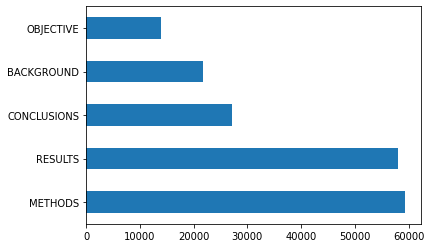

In [12]:
df_train['target'].value_counts().plot(kind = 'barh')

#### Get listed sentence

In [13]:
train_sent = df_train['text'].tolist()
val_sent = df_val['text'].tolist()
test_sent = df_test['text'].tolist()

In [14]:
train_sent[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

#### Onehot encode

In [15]:
from sklearn.preprocessing import OneHotEncoder
# could also use tf.onehot
encoder = OneHotEncoder(sparse = False) # non-sparse matrix
train_labels = encoder.fit_transform(df_train['target'].to_numpy().reshape(-1,1))
val_labels = encoder.transform(df_val["target"].to_numpy().reshape(-1, 1))
test_labels = encoder.transform(df_test["target"].to_numpy().reshape(-1, 1))

train_labels.shape

(180040, 5)

#### Label encode

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
train_labels2 = encoder2.fit_transform(df_train["target"].to_numpy())
val_labels2 = encoder2.transform(df_val["target"].to_numpy())
test_labels2 = encoder2.transform(df_test["target"].to_numpy())

train_labels2

array([3, 2, 2, ..., 4, 1, 1])

In [17]:
train_labels2.shape

(180040,)

In [18]:
class_name = encoder2.classes_
class_name

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Models

### Model 0 (Naive Bayes)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model0 = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('clf', MultinomialNB())
])
model0.fit(train_sent,train_labels2) # onehot not acceptable

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model0.score(val_sent,val_labels2)

0.7218323844829869

In [ ]:
pred0 = model0.predict(val_sent)

from sklearn.metrics import classification_report
print(classification_report(val_labels2,pred0))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56      3449
           1       0.65      0.59      0.61      4582
           2       0.72      0.87      0.79      9964
           3       0.75      0.14      0.23      2376
           4       0.76      0.86      0.81      9841

    accuracy                           0.72     30212
   macro avg       0.71      0.59      0.60     30212
weighted avg       0.72      0.72      0.70     30212



### Model 1 (Conv1D)

#### Text Vectorizer

In [19]:
import numpy as np
import tensorflow as tf

# avg sentence length
np.mean([len(s.split()) for s in train_sent])

26.338269273494777

In [ ]:
np.percentile([len(s.split()) for s in train_sent],95)

55.0

In [20]:
####
max_token = 68000

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vector = TextVectorization(max_tokens = max_token,
                                output_sequence_length = 55
                                )
text_vector.adapt(train_sent)

In [ ]:
text_vector.get_vocabulary()[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

#### Embedding

In [21]:
####
tok_emb = tf.keras.layers.Embedding(input_dim=(len(text_vector.get_vocabulary())),
                                    output_dim = 128,
                                    mask_zero = True # when input has lots of zero
                                    )

#### Create faster data

In [22]:
####
train_dataset = tf.data.Dataset.from_tensor_slices((train_sent, train_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sent, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sent, test_labels))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#### Build model

In [ ]:
input = tf.keras.Input(shape = (1,), dtype = tf.string)
x = text_vector(input)
x = tok_emb(x)
x = tf.keras.layers.Conv1D(64,kernel_size = 5,padding = 'same',activation = 'relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output = tf.keras.layers.Dense(len(class_name), activation = 'softmax')(x)
model1 = tf.keras.Model(input,output)

model1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model1.summary()

model1.fit(train_dataset,steps_per_epoch = int(0.1*len(train_dataset)),
          epochs = 3, validation_data = valid_dataset, 
          validation_steps = int(0.1*len(valid_dataset))
          )

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d_4 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 5)                 325 

In [ ]:
model1.evaluate(valid_dataset)

945/945 [==============================] - 5s 6ms/step - loss: 0.5962 - accuracy: 0.7883


[0.596219003200531, 0.7882960438728333]

In [ ]:
pred1 = model1.predict(valid_dataset)
pred1 = tf.argmax(pred1,axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_labels2,pred1))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57      3449
           1       0.67      0.74      0.70      4582
           2       0.86      0.88      0.87      9964
           3       0.60      0.58      0.59      2376
           4       0.86      0.86      0.86      9841

    accuracy                           0.79     30212
   macro avg       0.73      0.72      0.72     30212
weighted avg       0.79      0.79      0.79     30212



### Model 2 (Universal Sentence Emcoder)

In [23]:
import tensorflow as tf
import tensorflow_hub as hub
hub_emb = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                         trainable = False,
                         name = 'universal_sentence_encoder')

In [ ]:
input = tf.keras.Input(shape = [], # requires a empty list
                       dtype = tf.string)
pretrained = hub_emb(input)
x = tf.keras.layers.Dense(128, activation = 'relu')(pretrained)
output = tf.keras.layers.Dense(len(class_name),activation = 'softmax')(x)
model2 = tf.keras.Model(input,output)

model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = 'Adam',
               metrics = ['accuracy'])

model2.summary()

model2.fit(train_dataset,
           steps_per_epoch=int(0.1 * len(train_dataset)),
           epochs=3,validation_data=valid_dataset,
           validation_steps=int(0.1 * len(valid_dataset)))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________
Epoch 1/3
562/562 [==============================] - 18s 22ms/step - loss: 0.9207 - accuracy: 0.6484 - val_l

In [ ]:
model2.evaluate(valid_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.7396 - accuracy: 0.7142


[0.7395514845848083, 0.7142195105552673]

In [ ]:
pred2 = model2.predict(valid_dataset)
pred2 = tf.argmax(pred2, axis = 1)

from sklearn.metrics import classification_report
print(classification_report(val_labels2,pred2))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49      3449
           1       0.57      0.67      0.61      4582
           2       0.79      0.78      0.79      9964
           3       0.53      0.55      0.54      2376
           4       0.78      0.81      0.80      9841

    accuracy                           0.71     30212
   macro avg       0.66      0.65      0.65     30212
weighted avg       0.71      0.71      0.71     30212



### Model 3 (Character Embedding)

In [ ]:
list('hello how are you')

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u']

In [26]:
####
def split_to_char(text):
  return ' '.join(list(text))

train_char = [split_to_char(sent) for sent in train_sent]
val_char = [split_to_char(sent) for sent in val_sent]
test_char = [split_to_char(sent) for sent in test_sent]

In [ ]:
train_char[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
import numpy as np
int(np.percentile([len(sent) for sent in train_sent], 95))

290

In [33]:
####
import string

alphabet = string.ascii_lowercase+string.digits+string.punctuation
num_char = len(alphabet)+2 # for space and out of vocab

char_vector = TextVectorization(max_tokens=num_char,
                                output_sequence_length = 290,
                                standardize = 'lower_and_strip_punctuation',
                                name = 'char_vector')
char_vector.adapt(train_char)

In [ ]:
len(char_vector.get_vocabulary())

28

In [28]:
####
emb = tf.keras.layers.Embedding(input_dim=len(char_vector.get_vocabulary()),
                                output_dim = 25,
                                mask_zero = True
                                )

In [ ]:
input = tf.keras.Input(shape = (1,), dtype = tf.string)
x = char_vector(input)
x = emb(x)
x = tf.keras.layers.Conv1D(64,5, padding = 'same',activation = 'relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
output = tf.keras.layers.Dense(len(class_name), activation = 'softmax')(x)

model3 = tf.keras.Model(input,output)
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vector (TextVectorizat  (None, 290)              0         
 ion)                                                            
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 5)                 325 

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_char, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_char, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_char, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

model3.fit(train_char_dataset, steps_per_epoch=int(len(train_char_dataset)),
           epochs = 3, validation_data = val_char_dataset,
           validation_steps = int(len(val_char_dataset)))

Epoch 1/3
5627/5627 [==============================] - 59s 10ms/step - loss: 0.9569 - accuracy: 0.6201 - val_loss: 0.8313 - val_accuracy: 0.6735
Epoch 2/3
5627/5627 [==============================] - 58s 10ms/step - loss: 0.7691 - accuracy: 0.7067 - val_loss: 0.7613 - val_accuracy: 0.7063
Epoch 3/3
5627/5627 [==============================] - 58s 10ms/step - loss: 0.7254 - accuracy: 0.7258 - val_loss: 0.7396 - val_accuracy: 0.7165


In [ ]:
model3.evaluate(val_char_dataset)

945/945 [==============================] - 5s 6ms/step - loss: 0.7396 - accuracy: 0.7165


[0.7395703792572021, 0.7164703011512756]

In [ ]:
pred3 = model3.predict(val_char_dataset)
pred3 = tf.argmax(pred3,axis = 1)

from sklearn.metrics import classification_report
print(classification_report(val_labels2,pred3))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      3449
           1       0.66      0.49      0.56      4582
           2       0.84      0.76      0.80      9964
           3       0.69      0.43      0.53      2376
           4       0.69      0.90      0.78      9841

    accuracy                           0.72     30212
   macro avg       0.69      0.63      0.65     30212
weighted avg       0.72      0.72      0.71     30212



### Model 4 (Token + Character Embeddings)

In [34]:
import tensorflow as tf
import tensorflow_hub as hub
hub_embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")
# token model
token_input = tf.keras.layers.Input(shape = [], dtype = tf.string, name = 'token_input') # don't need shape for USE
token_embedding = hub_embed(token_input)
token_out = tf.keras.layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(token_input, token_out)

#char model
char_input = tf.keras.layers.Input(shape = (1,),dtype = tf.string, name = 'char_input')
char_vect = char_vector(char_input)
char_embedding = emb(char_vect)
char_bi = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(char_input,char_bi)

# Concatenate token and char
token_char = tf.keras.layers.Concatenate(name = "token_char_hybrid")([token_model.output,
                                            char_model.output]) # want the output for the feed forward network

# Create output layers
combine_dense = tf.keras.layers.Dropout(0.5)(token_char)
combine_dense = tf.keras.layers.Dense(128,activation = 'relu')(combine_dense)
combine_dense = tf.keras.layers.Dropout(0.5)(combine_dense)
output = tf.keras.layers.Dense(len(class_name),activation = 'softmax')(combine_dense)

# Final model
model4 = tf.keras.Model([token_model.input,char_model.input],output, name = 'model4')
model4.summary()

Model: "model4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vector (TextVectorization  (None, 290)         0           ['char_input[0][0]']             
 )                                                                                                
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_input[0][0]']       

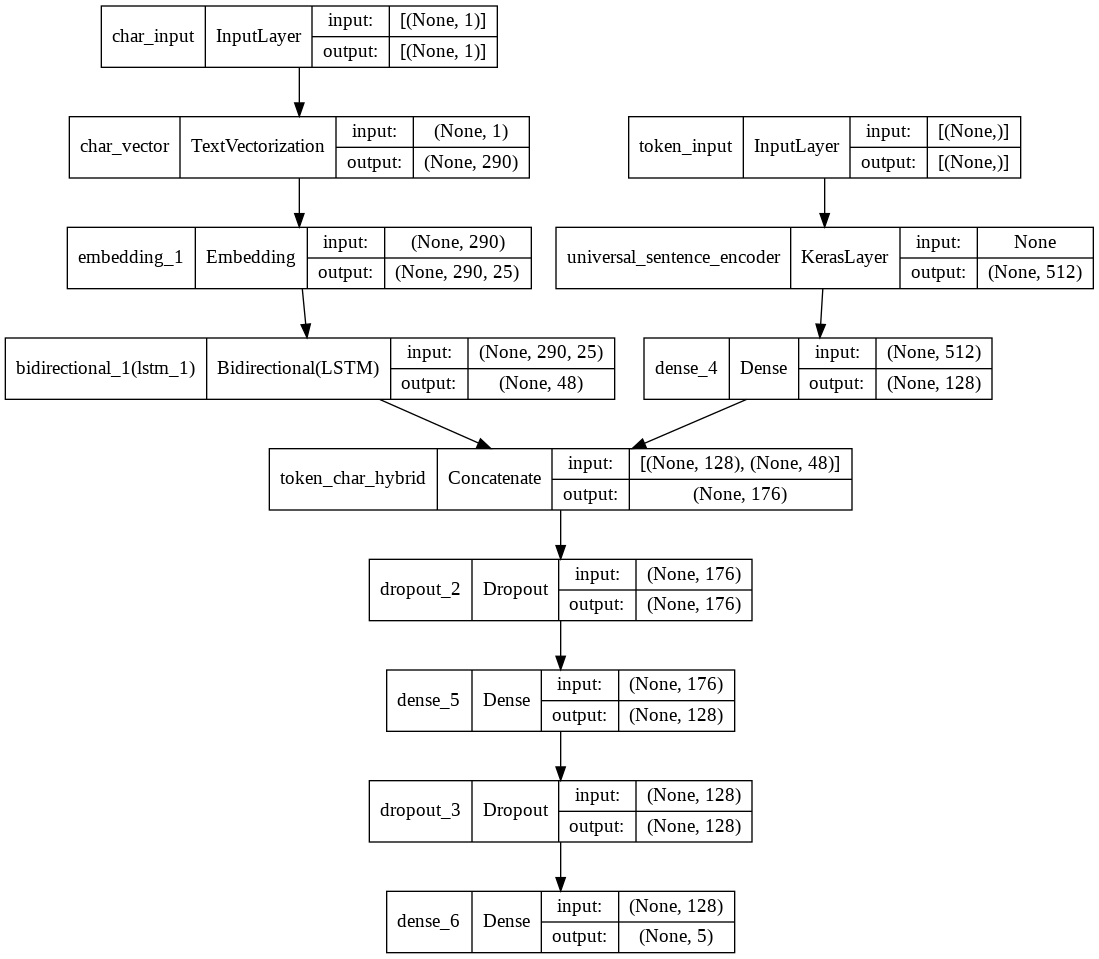

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model4,show_shapes=True)

In [38]:
model4.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [40]:
# the order of token and character matters ([token_model.input,char_model.input])
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sent, train_char)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sent, val_char))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

train_char_token_dataset

<ZipDataset shapes: (((), ()), (5,)), types: ((tf.string, tf.string), tf.float64)>

In [41]:
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_char_token_dataset

<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>

In [42]:
model4.fit(train_char_token_dataset, 
           steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
           epochs = 3, validation_data=val_char_token_dataset,
           validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 91s 134ms/step - loss: 0.9993 - accuracy: 0.5981 - val_loss: 0.7948 - val_accuracy: 0.6975
Epoch 2/3
562/562 [==============================] - 72s 127ms/step - loss: 0.8102 - accuracy: 0.6867 - val_loss: 0.7225 - val_accuracy: 0.7227
Epoch 3/3
562/562 [==============================] - 68s 121ms/step - loss: 0.7776 - accuracy: 0.7017 - val_loss: 0.6971 - val_accuracy: 0.7350


In [43]:
model4.evaluate(val_char_token_dataset)

945/945 [==============================] - 49s 52ms/step - loss: 0.6980 - accuracy: 0.7343


[0.6980432271957397, 0.7342777848243713]

In [44]:
pred4 = model4.predict(val_char_token_dataset)
pred4 = tf.argmax(pred4, axis = 1)

from sklearn.metrics import classification_report
print(classification_report(val_labels2,pred4))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50      3449
           1       0.58      0.67      0.62      4582
           2       0.80      0.83      0.81      9964
           3       0.60      0.58      0.59      2376
           4       0.81      0.81      0.81      9841

    accuracy                           0.73     30212
   macro avg       0.68      0.66      0.67     30212
weighted avg       0.73      0.73      0.73     30212



### Model 5 (Token + Character + Position)

#### One Hot Encode line and total line

In [49]:
print(df_train['line_num'].value_counts())
df_train.head()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_num, dtype: int64


,target,text,line_num,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [46]:
# For line number
train_line_one_hot = tf.one_hot(df_train['line_num'].to_numpy(), depth = 15)
val_line_one_hot = tf.one_hot(df_val['line_num'].to_numpy(), depth = 15)
test_line_one_hot = tf.one_hot(df_test['line_num'].to_numpy(), depth = 15)

In [52]:
train_line_one_hot.shape

TensorShape([180040, 15])

In [47]:
np.percentile(df_train['total_lines'], 98)

20.0

In [50]:
# For total line
train_total_lines_one_hot = tf.one_hot(df_train['total_lines'].to_numpy(),depth = 20)
val_total_lines_one_hot = tf.one_hot(df_val['total_lines'].to_numpy(),depth = 20)
test_total_lines_one_hot = tf.one_hot(df_test['total_lines'].to_numpy(),depth = 20)

In [53]:
train_total_lines_one_hot.shape

TensorShape([180040, 20])

#### Build Model

In [59]:
# Token input
token_input = tf.keras.layers.Input(shape = [],dtype = tf.string, name = 'token_input')
token_embedding = hub_emb(token_input)
token_output = tf.keras.layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(token_input,
                             token_output)

# Char input
char_input = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = 'char_input')
char_vec = char_vector(char_input)
char_embedding = emb(char_vec)
char_bi = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(char_input,
                            char_bi)
# Line number
line_input = tf.keras.layers.Input(shape = (15,), dtype = tf.float32, name = 'line_number_input')
line_output = tf.keras.layers.Dense(32, activation = 'relu')(line_input)
line_model = tf.keras.Model(line_input, line_output)

# Total lines
total_input = tf.keras.layers.Input(shape = (20,), dtype = tf.float32, name = 'Total_line_input')
total_output = tf.keras.layers.Dense(32, activation = 'relu')(total_input)
total_line_model = tf.keras.Model(total_input, total_output)

# Combine token and char
combine_emb = tf.keras.layers.Concatenate(name = 'char_token_embedding')([token_model.output,
                                                                          char_model.output])
# Add dropout
z = tf.keras.layers.Dense(256,activation = 'relu')(combine_emb)
z = tf.keras.layers.Dropout(0.5)(z)

# Combine positional and token/char embedding
tri_emb = tf.keras.layers.Concatenate(name = 'char_token_position_embedding')([line_model.output,
                                                                               total_line_model.output,
                                                                               z])
# Create output layer
output_layer = tf.keras.layers.Dense(5, activation = 'softmax',name = 'output')(tri_emb)   

# Combine all
model5 = tf.keras.Model(inputs = [line_model.input,
                                  total_line_model.input,
                                  token_model.input,
                                  char_model.input],
                        outputs = output_layer)                                                                             

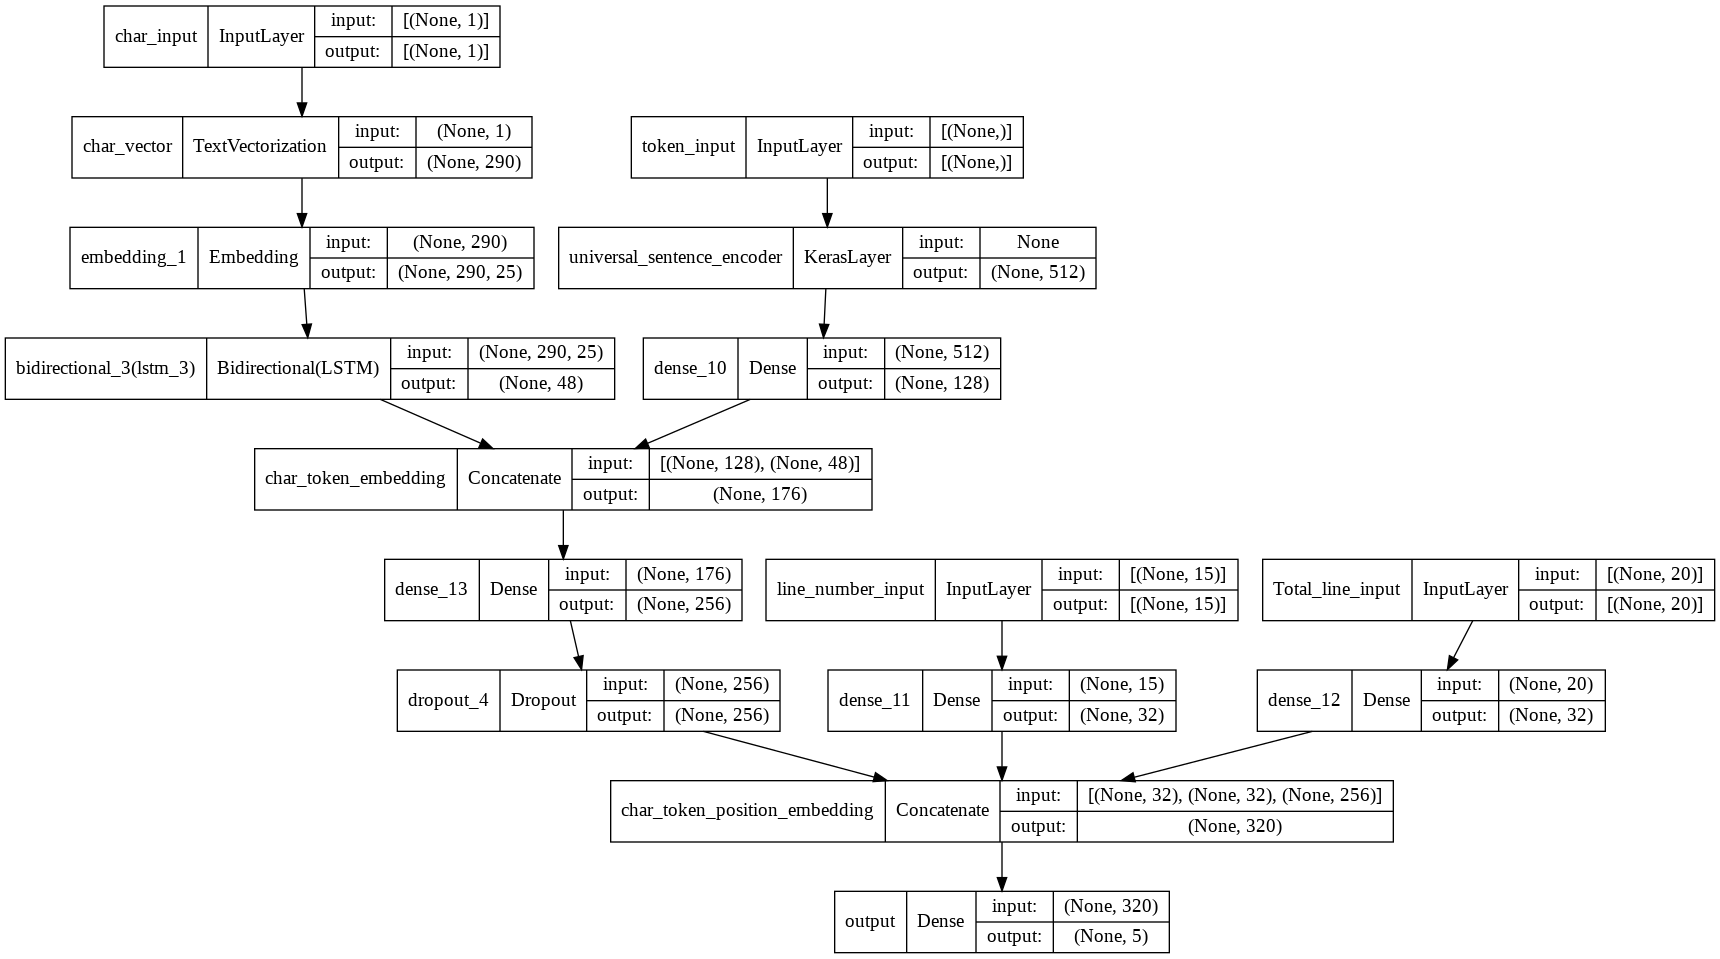

In [60]:
from tensorflow.keras.utils import plot_model
plot_model(model5,show_shapes=True)

In [65]:
model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), 
                # add label smoothing
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Label smoothing helps to regularize our model (prevent overfitting) by making sure it doesn't get too focused on applying one particular label to a sample.

#### Create dataset and fit

In [63]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_one_hot, 
                                                                train_total_lines_one_hot,
                                                                train_sent,
                                                                train_char)) 
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels) 
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) 
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sent,
                                                              val_char))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

train_pos_char_token_dataset

<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>

In [66]:
model5.fit(train_pos_char_token_dataset,
           steps_per_epoch = int(0.1*len(train_pos_char_token_dataset)),
           epochs = 3,
           validation_data=val_pos_char_token_dataset,
           validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 88s 136ms/step - loss: 1.0958 - accuracy: 0.7254 - val_loss: 0.9864 - val_accuracy: 0.8012
Epoch 2/3
562/562 [==============================] - 73s 130ms/step - loss: 0.9672 - accuracy: 0.8141 - val_loss: 0.9504 - val_accuracy: 0.8278
Epoch 3/3
562/562 [==============================] - 69s 123ms/step - loss: 0.9483 - accuracy: 0.8248 - val_loss: 0.9380 - val_accuracy: 0.8288


In [67]:
model5.evaluate(val_pos_char_token_dataset)

945/945 [==============================] - 51s 53ms/step - loss: 0.9356 - accuracy: 0.8336


[0.9355681538581848, 0.8335760831832886]

In [68]:
pred5 = model5.predict(val_pos_char_token_dataset)
pred5 = tf.argmax(pred5, axis = 1)

from sklearn.metrics import classification_report
print(classification_report(val_labels2,pred5))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3449
           1       0.82      0.85      0.83      4582
           2       0.88      0.88      0.88      9964
           3       0.71      0.59      0.64      2376
           4       0.86      0.87      0.87      9841

    accuracy                           0.83     30212
   macro avg       0.80      0.79      0.79     30212
weighted avg       0.83      0.83      0.83     30212



## Evaluation

### Save model

In [72]:
model5.save('skimlit_model')

INFO:tensorflow:Assets written to: skimlit_model/assets


INFO:tensorflow:Assets written to: skimlit_model/assets


In [ ]:
load_model = tf.keras.models.load_model('skimlit_model')

### For test data

In [73]:
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sent,
                                                               test_char))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [74]:
prob = model5.predict(test_pos_char_token_dataset,verbose=1)
pred = tf.argmax(prob, axis = 1)

942/942 [==============================] - 48s 51ms/step


In [75]:
from sklearn.metrics import classification_report
print(classification_report(test_labels2,pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      3621
           1       0.81      0.85      0.83      4571
           2       0.87      0.88      0.88      9897
           3       0.70      0.59      0.64      2333
           4       0.86      0.86      0.86      9713

    accuracy                           0.83     30135
   macro avg       0.79      0.78      0.79     30135
weighted avg       0.83      0.83      0.83     30135



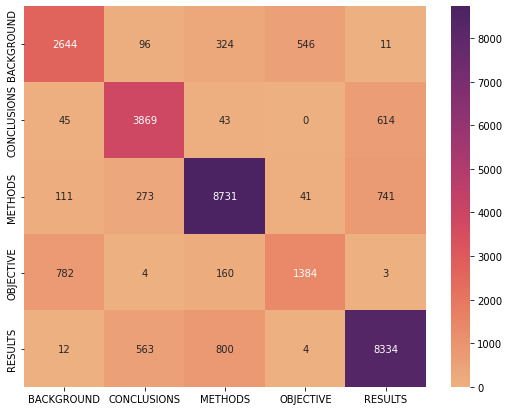

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

M = confusion_matrix(y_true = test_labels2, y_pred = pred)
plt.figure(figsize = (9,7))
sns.heatmap(M,annot = True, cmap = 'flare',fmt = 'd',
            xticklabels=class_name, yticklabels = class_name)
plt.show()

In [80]:
df_test

,target,text,line_num,total_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8
...,...,...,...,...
30130,RESULTS,there was a statistically significant between-...,13,17
30131,RESULTS,there were no statistically significant betwee...,14,17
30132,RESULTS,there was no significant association between s...,15,17
30133,RESULTS,no adverse effects were reported .,16,17


In [85]:
prob

array([[0.3070561 , 0.09607327, 0.05168844, 0.4923166 , 0.05286557],
       [0.35393453, 0.07749134, 0.21241358, 0.3261118 , 0.03004875],
       [0.07747585, 0.02283459, 0.75013286, 0.09502975, 0.05452693],
       ...,
       [0.06770498, 0.07594253, 0.08849712, 0.05131122, 0.71654415],
       [0.06471932, 0.06785023, 0.07063851, 0.0437091 , 0.7530829 ],
       [0.08510544, 0.5424561 , 0.13282597, 0.04882226, 0.19079018]],
      dtype=float32)

In [91]:
import pandas as pd
df_test['pred'] = [class_name[i] for i in pred.numpy()]

df_test['prob'] = tf.reduce_max(prob,axis = 1).numpy()

df_test['acc'] = df_test.apply(lambda x: 1 if x['pred'] == x['target'] else 0, axis = 1)

df_test.head()

,target,text,line_num,total_lines,pred,prob,acc
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.492317,0
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,BACKGROUND,0.353935,0
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.750133,0
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.620423,0
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.708939,1


In [96]:
df_wrong = df_test[df_test['acc'] == 0].sort_values(by = 'prob', ascending=False)
df_wrong = df_wrong.reset_index()

for i in range(10):
  print(f"Target: {df_wrong.loc[i,'target']}, Pred: {df_wrong.loc[i,'pred']}, Prob: {df_wrong.loc[i,'prob']}, Line number: {df_wrong.loc[i,'line_num']}, Total lines: {df_wrong.loc[i,'total_lines']}\n")
  print(f"Text:\n{df_wrong.loc[i,'text']}\n")
  print("-----\n")

Target: RESULTS, Pred: METHODS, Prob: 0.9456683397293091, Line number: 4, Total lines: 13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

-----

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9342359304428101, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9269504547119141, Line number: 3, Total lines: 16

Text:
a cluster randomised trial was implemented with @,@ children in @ government primary schools on the south coast of kenya in @-@ .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9266694784164429, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9246124029159546, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: METHODS, Pred: RESULTS, Prob: 0.9182432889938354, Line number

## Predict User Input (from course notebook)

In [97]:
import json
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2021-11-21 11:15:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2021-11-21 11:15:12 (58.7 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'details': 'RCT of a manualized social treatment for high-functioning autism spectrum 

In [98]:
abstracts = pd.DataFrame(example_abstracts)
abstracts.head()

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [99]:
from spacy.lang.en import English
nlp = English() # setup English sentence parser
sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser
doc = nlp(example_abstracts[0]["abstract"]) # create "doc" of parsed sequences, change index for a different abstract
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [100]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'line_number': 0,
  'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'total_lines': 7},
 {'line_number': 1,
  'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'total_lines': 7},
 {'line_number': 2,
  'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'total_lines': 7},
 {'line_number': 3,
  'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'total_lines': 7},
 {'line_number': 4,
  'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'total_lines': 7},
 {'line_number': 5,
  'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'total_lines': 7},
 {'line_

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15) 

In [ ]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)

In [105]:
def split_chars(text):
  return " ".join(list(text))

In [106]:
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [108]:
test_abstract_pred_probs = model5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))

In [111]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
# Turn prediction class integers into string class names
test_abstract_pred_classes = [encoder2.classes_[i] for i in test_abstract_preds]

for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
